## Task 1: Exploratory Data Analysis (EDA)
EDA involves exploring the datasets to understand their structure, content, and any interesting patterns. We'll load the three datasets and examine them for:

Missing values
Data types
Key statistics
Relationships between the data
Visual insights

In [19]:
# Data Science Assignment: eCommerce Transactions Analysis

import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import json
sns.set(style="whitegrid")

In [21]:
# Loading the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [23]:
# Displaying the first few rows of each dataset to understand their structure
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

In [25]:
# Inspect datasets
print(customers.info(),"\n")
print(products.info(),"\n")
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------

In [27]:
# Data Cleaning
# Converting date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [29]:
print(customers.isnull().sum(),"\n")
print(products.isnull().sum(),"\n")
print(transactions.isnull().sum(),"\n")

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID       0
CustomerID          0
ProductID           0
TransactionDate     0
Quantity            0
TotalValue          0
Price               0
TransactionMonth    0
dtype: int64 



In [31]:
print(customers.describe(include='all'),"\n")
print(products.describe(include='all'),"\n")
print(transactions.describe(include='all'),"\n")

       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00 

       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  Activ

In [33]:
print(customers.duplicated().sum(),"\n",
      products.duplicated().sum(),"\n",
      transactions.duplicated().sum())


0 
 0 
 0


In [35]:
print(customers.columns.tolist(),"\n\n",
products.columns.tolist(),"\n\n",
transactions.columns.tolist())

['CustomerID', 'CustomerName', 'Region', 'SignupDate'] 

 ['ProductID', 'ProductName', 'Category', 'Price'] 

 ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price', 'TransactionMonth']


In [37]:
print(customers.shape,"\n",
products.shape,"\n",
transactions.shape)

(200, 4) 
 (100, 4) 
 (1000, 8)


In [39]:
# Analyzing customers by region
customers_by_region = customers['Region'].value_counts()

customers_by_region.head()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [41]:
# Analyzing top-selling products and categories by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
top_categories = products.loc[products['ProductID'].isin(top_products.index), 'Category'].value_counts()

print(top_products.head(),"\n\n", 
      top_categories.head())


ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64 

 Category
Home Decor     2
Electronics    1
Books          1
Clothing       1
Name: count, dtype: int64


In [43]:
# Analyzing transaction trends over time (Monthly)
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()

monthly_sales

TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

In [45]:
# Revenue by product category

category_revenue = (transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False))
category_revenue

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

In [47]:
# Customer spending distribution

customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
print(customer_spending.describe())

count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64


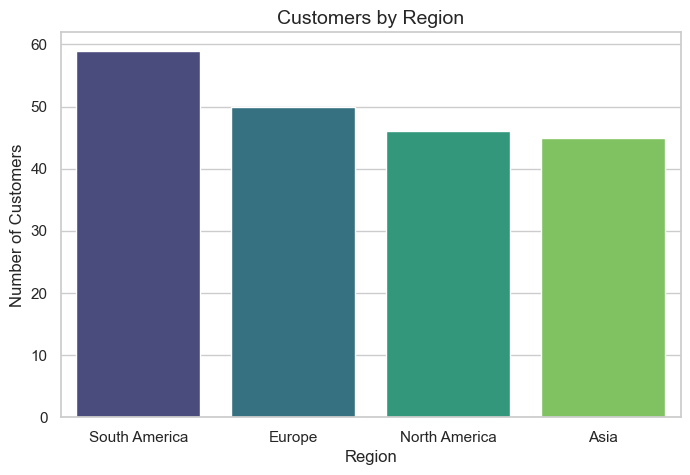

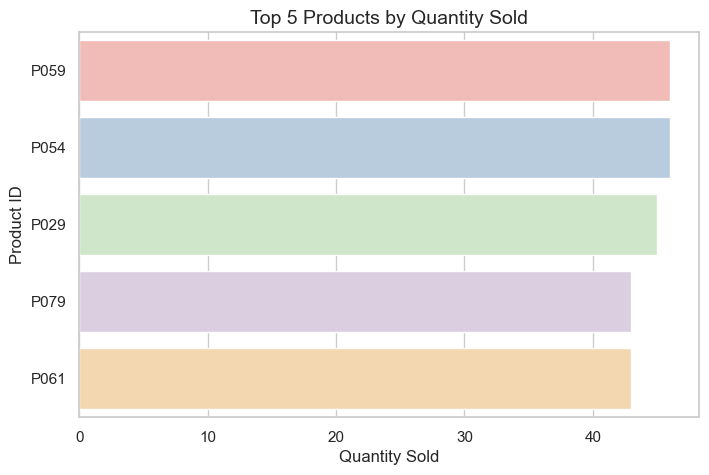

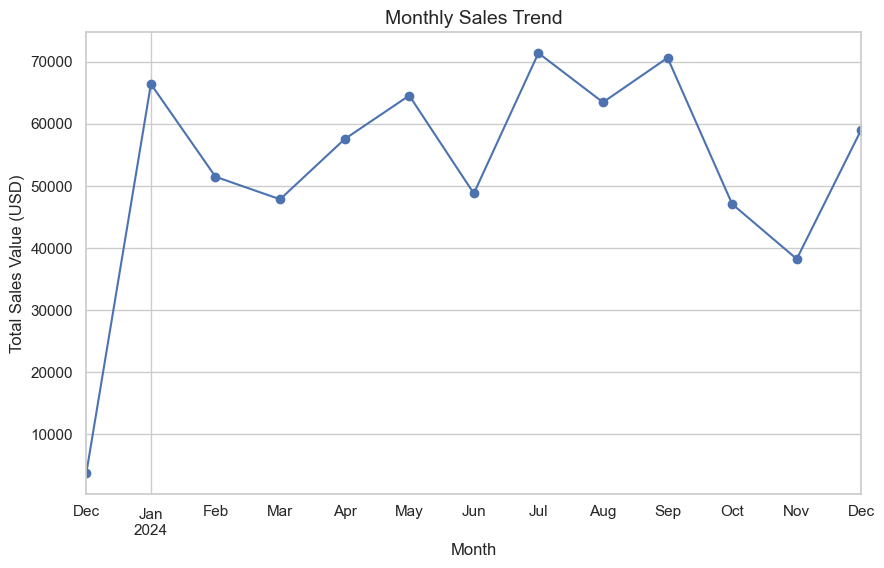

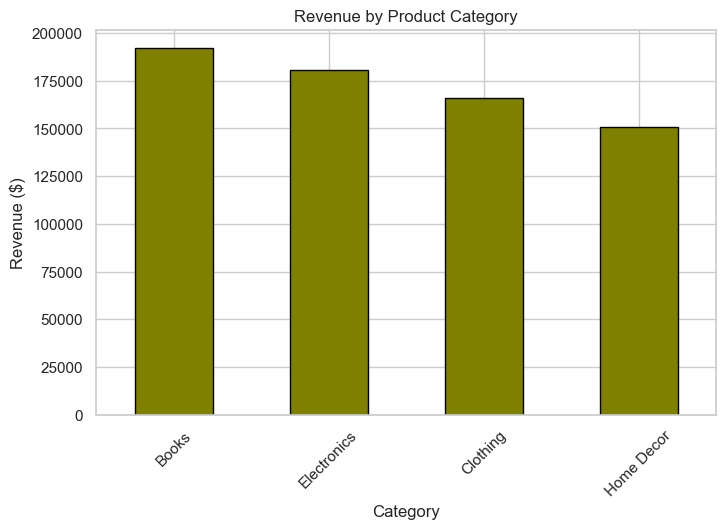

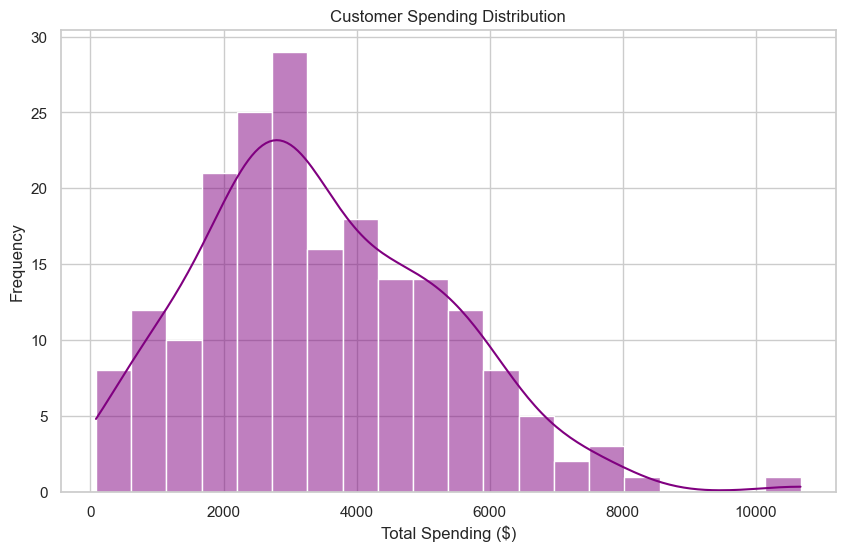

In [49]:
# Plotting Customers by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=customers_by_region.index, y=customers_by_region.values, palette='viridis',hue=customers_by_region.index,legend=False)
plt.title("Customers by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

# Plotting Top 5 Products by Quantity Sold
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='Pastel1',hue=top_products.index, orient="h")
plt.title("Top 5 Products by Quantity Sold", fontsize=14)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product ID", fontsize=12)
plt.show()

# Plotting Monthly Sales Trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Value (USD)", fontsize=12)
plt.grid(True)
plt.show()

# EDA: Revenue by product category
category_revenue = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
category_revenue.sort_values(ascending=False).plot(kind='bar', color='olive', edgecolor='black')
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

# EDA: Customer spending distribution
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, kde=True, color='purple', bins=20)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spending ($)")
plt.ylabel("Frequency")
plt.show()
